# Problem 1
### (a)

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseNumData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


In [7]:
houseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


<AxesSubplot:>

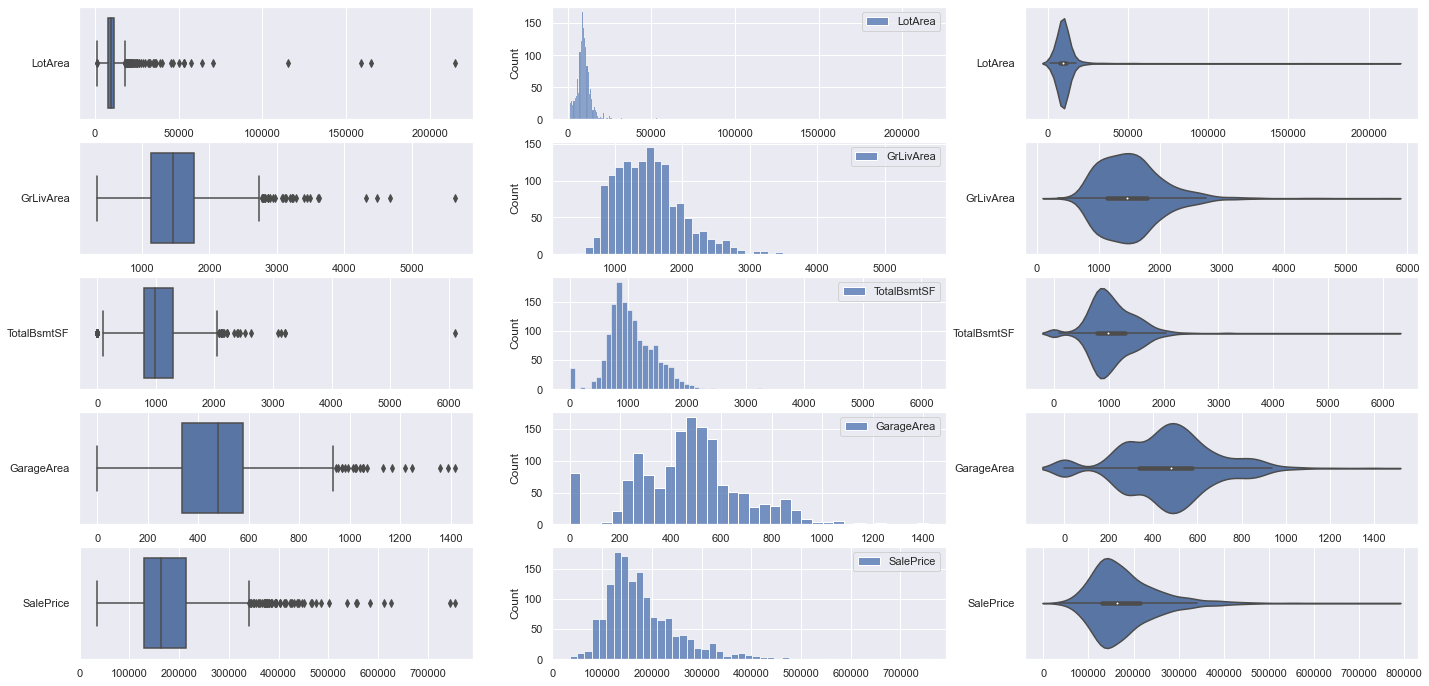

In [16]:
lotarea = pd.DataFrame(houseNumData['LotArea'])
grlivarea = pd.DataFrame(houseNumData['GrLivArea'])
totalbsmtsf = pd.DataFrame(houseNumData['TotalBsmtSF'])
garagearea = pd.DataFrame(houseNumData['GarageArea'])
saleprice = pd.DataFrame(houseNumData['SalePrice'])

# Set up matplotlib figure with three subplots
f, axes = plt.subplots(5, 3, figsize=(24, 12))


# Plot the basic uni-variate figures for LotArea
sb.boxplot(data = lotarea, orient = "h", ax = axes[0,0])
sb.histplot(data = lotarea, ax = axes[0,1])
sb.violinplot(data = lotarea, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for GrLivArea
sb.boxplot(data = grlivarea, orient = "h", ax = axes[1,0])
sb.histplot(data = grlivarea, ax = axes[1,1])
sb.violinplot(data = grlivarea, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for TotalBsmtSF
sb.boxplot(data = totalbsmtsf, orient = "h", ax = axes[2,0])
sb.histplot(data = totalbsmtsf, ax = axes[2,1])
sb.violinplot(data = totalbsmtsf, orient = "h", ax = axes[2,2])

# Plot the basic uni-variate figures for GarageArea
sb.boxplot(data = garagearea, orient = "h", ax = axes[3,0])
sb.histplot(data = garagearea, ax = axes[3,1])
sb.violinplot(data = garagearea, orient = "h", ax = axes[3,2])

# Plot the basic uni-variate figures for SalePrice
sb.boxplot(data = saleprice, orient = "h", ax = axes[4,0])
sb.histplot(data = saleprice, ax = axes[4,1])
sb.violinplot(data = saleprice, orient = "h", ax = axes[4,2])



---
### (b)

In [49]:
#lotarea.skew()
np.log(houseData.LotArea).skew()

-0.1379938086958118

In [51]:
#grlivarea.skew()
np.log(houseData.GrLivArea).skew()

-0.006995182187690808

In [54]:
#totalbsmtsf.skew()
np.log(houseData.TotalBsmtSF).skew()

nan

In [25]:
garagearea.skew()


GarageArea    0.179981
dtype: float64

In [26]:
saleprice.skew()

SalePrice    1.882876
dtype: float64

(b) lot area has the maximum number of outliers

---
### (c) & (d)

1. Jointplot

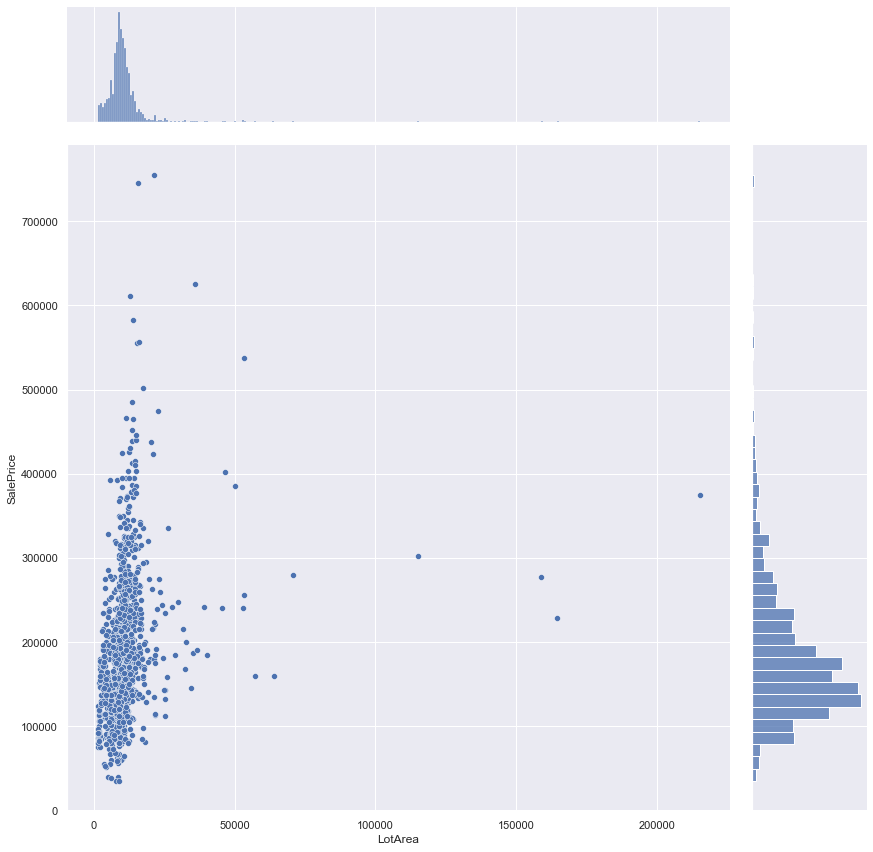

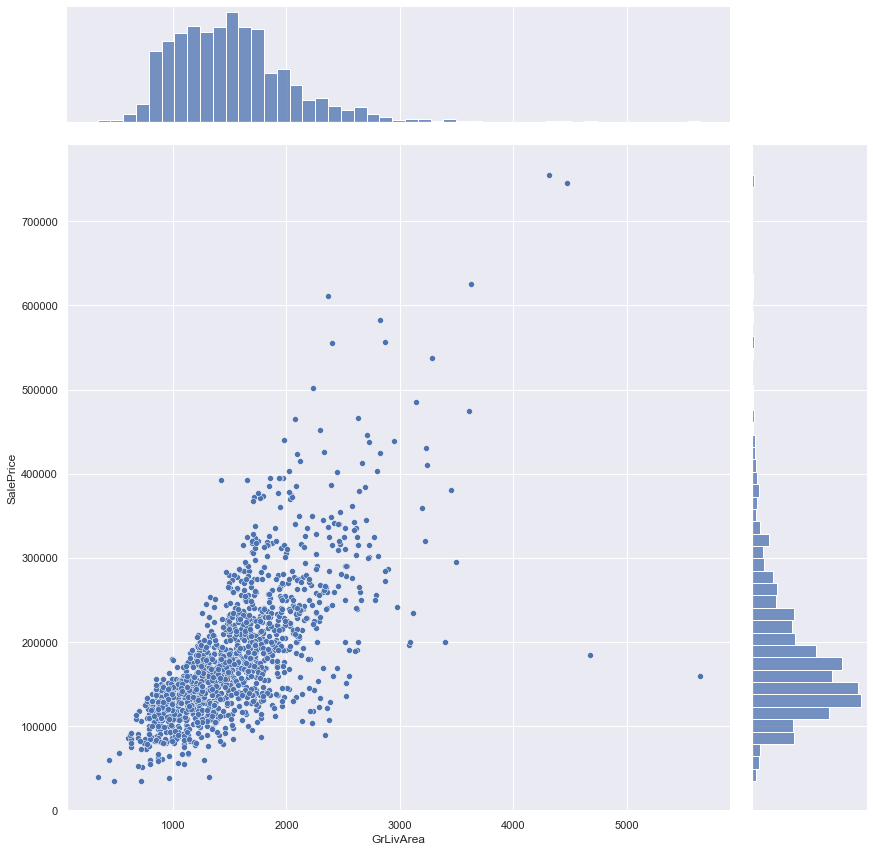

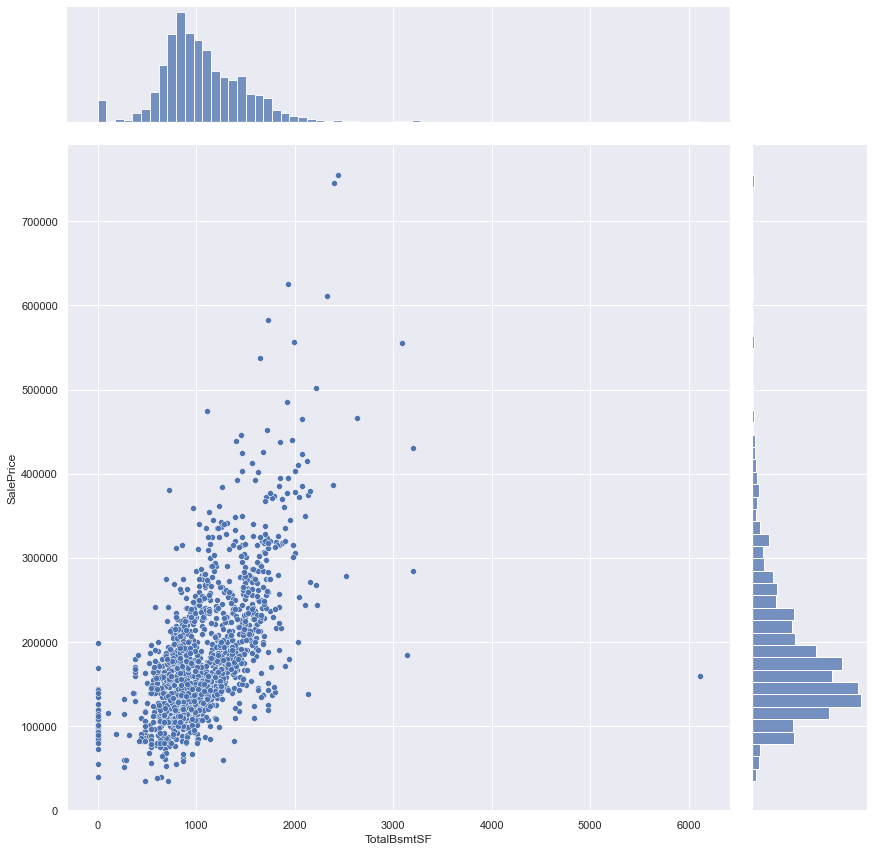

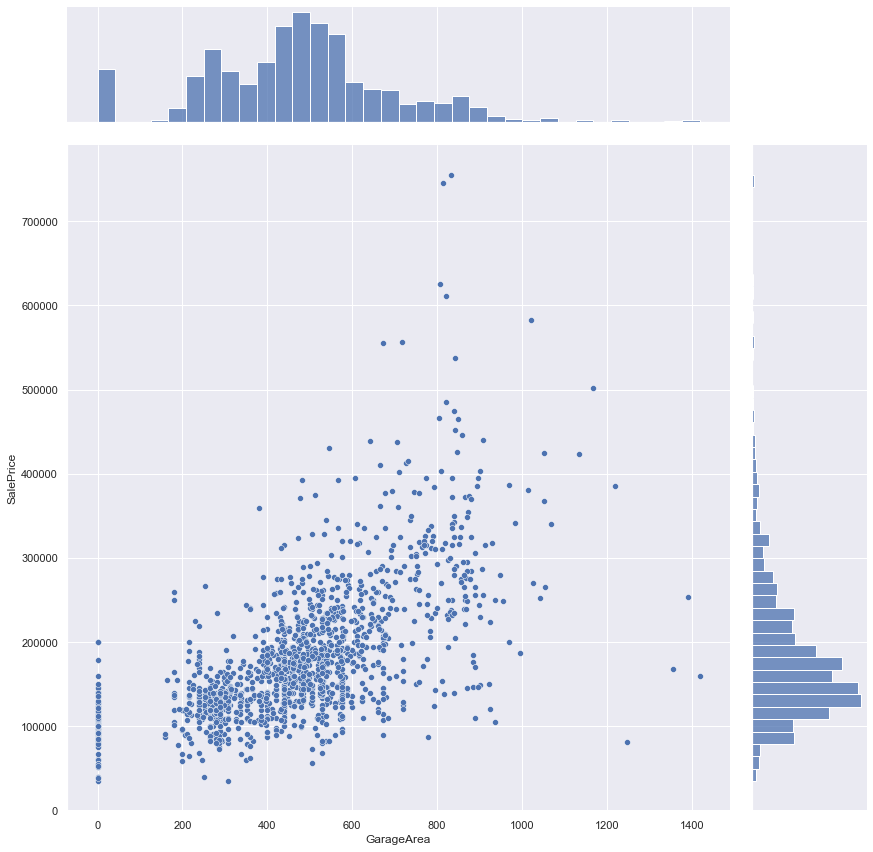

In [68]:
# Set up matplotlib figure with three subplots
#f, axes = plt.subplots(2, 2, figsize=(24, 12))

# Create a joint dataframe by concatenating the two variables
jointDF1 = pd.concat([lotarea, saleprice], axis = 1).reindex(lotarea.index)
jointDF2 = pd.concat([grlivarea, saleprice], axis = 1).reindex(lotarea.index)
jointDF3 = pd.concat([totalbsmtsf, saleprice], axis = 1).reindex(lotarea.index)
jointDF4 = pd.concat([garagearea, saleprice], axis = 1).reindex(lotarea.index)


# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF1, x = "LotArea", y = "SalePrice", height = 12)
sb.jointplot(data = jointDF2, x = "GrLivArea", y = "SalePrice", height = 12)
sb.jointplot(data = jointDF3, x = "TotalBsmtSF", y = "SalePrice", height = 12)
sb.jointplot(data = jointDF4, x = "GarageArea", y = "SalePrice", height = 12)

---
2. Mutual Correlation

In [58]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([lotarea, grlivarea, totalbsmtsf, garagearea, saleprice], axis = 1).reindex(lotarea.index)

# Calculate the correlation between the two columns/variables
jointDF.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


---
3. Heat map

<AxesSubplot:>

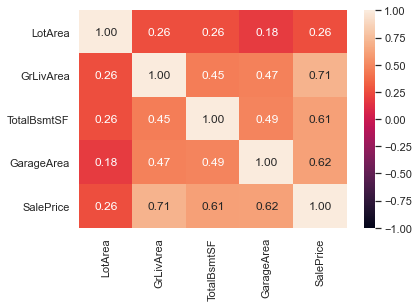

In [59]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

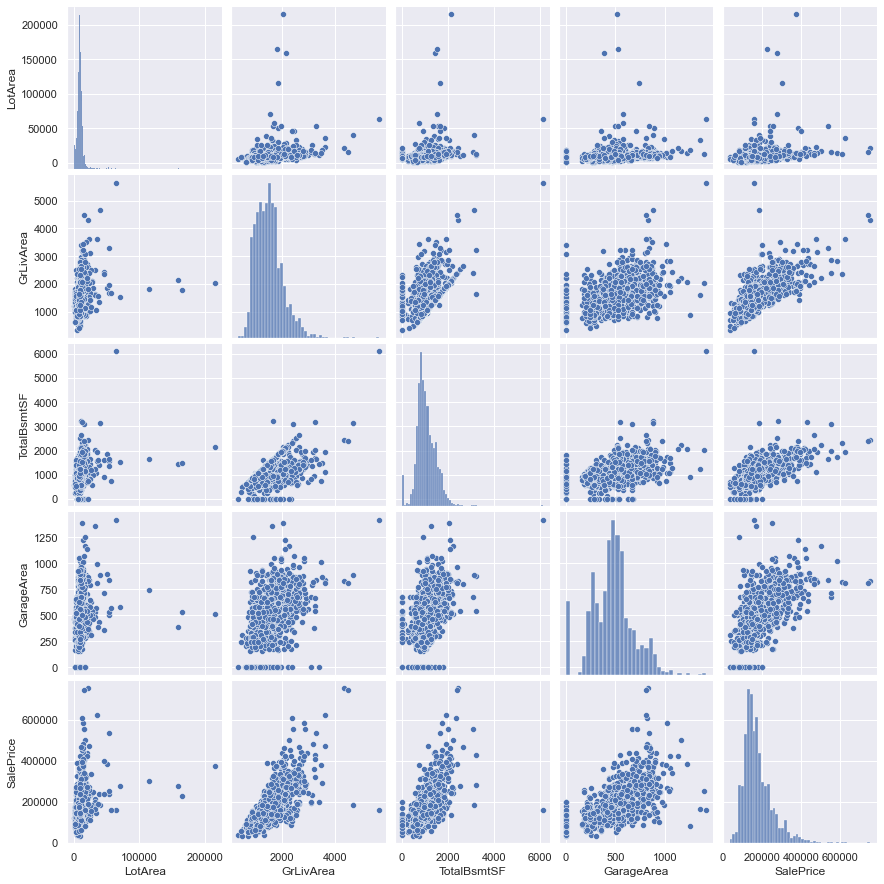

In [74]:
# Draw pairs of variables against one another
sb.pairplot(data = jointDF)

GrLivArea has the strongest relationship with "SalePrice".
It will be useful in predicting "Sale Price".


---
# Problem 2

### (a)

In [48]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


In [86]:
houseCatData.MSSubClass.astype("category")

type(houseCatData.MSSubClass)

pandas.core.series.Series